#### CMSE 202 Final Project
### &#9989; Griffin Frendo, Ian Byram, Ty Buckley, Yoel Garcia 
### &#9989; Section 002
#### &#9989; 4/26/21

# Background/Motivation

The legalization and decriminalization of  drugs is a very tense and debated topic in today's society. Such a law passed will have major impacts for society, some very good, some bad. Through this project we want to explore some impacts that have already occurred on countries, states and communities across the world.  


The original topic question: How legalization of drug decreases crime.

We want to expanded on this topic. The reason we expanded the topic is because there are not many great datasets for the time periods that we need in terms of crime rate. Also, the legalization/decriminalization of drugs has a much broader impact than just crime therefore to get a larger understanding of its impact we wanted to look at other metrics as well.

**Overall new question**: How does the legalization/decriminalization impact society in terms of crime, overdoses and HIV rates?


# Data Used







State of California Department of Justice - Includes the years (2010-2019) with the type of crime committed and a count of how many times it was committed.

Country Homicides- Includes number of homicides from each year starting in 1990 going to 2018. 


# Methodology

### Cleaning Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import statsmodels.api as sm


In [2]:
cali = pd.read_csv("State of California Department of Justice - OpenJustice.csv")

cali.head(5) #First Five rows

,,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Crimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Violent Crimes,"163,957","155,313","160,629","151,634","151,425","166,588","174,701","178,553","176,866","173,205"
2,Homicide,"1,809","1,794","1,878","1,745","1,697","1,861","1,930","1,829","1,739","1,679"
3,Rape (Forcible Rape prior to 2014),"8,325","7,678","7,828","7,459","9,397","12,793","13,695","14,724","15,500","14,720"
4,Rape,"7,408","6,792","6,935","6,665","8,562","11,827","12,785","13,799","14,526","13,791"


In [3]:
cali.columns

cali.columns = ["Type of Crime", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"]

cali.head(2)

,Type of Crime,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Crimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Violent Crimes,"163,957","155,313","160,629","151,634","151,425","166,588","174,701","178,553","176,866","173,205"


In [4]:
cali.dtypes

Type of Crime    object
2010             object
2011             object
2012             object
2013             object
2014             object
2015             object
2016             object
2017             object
2018             object
2019             object
dtype: object

In [5]:
cali.fillna(0, inplace = True)

In [6]:
cali.replace(",", '', regex=True, inplace = True)

In [7]:
intconvert = {"2010":int,
            "2011": int,
            "2012": int,
            "2013": int,
            "2014":int,
            "2015":int,
            "2016":int,
            "2017":int,
            "2018":int,
            "2019":int}

In [8]:
cali = cali.astype(intconvert)

In [9]:
cali.dtypes

Type of Crime    object
2010              int32
2011              int32
2012              int32
2013              int32
2014              int32
2015              int32
2016              int32
2017              int32
2018              int32
2019              int32
dtype: object

In [10]:
cali = cali.drop(index = 0)

cali.head(1)

,Type of Crime,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Violent Crimes,163957,155313,160629,151634,151425,166588,174701,178553,176866,173205


In [11]:
cali = cali.iloc[[0,25]]
cali

,Type of Crime,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Violent Crimes,163957,155313,160629,151634,151425,166588,174701,178553,176866,173205
26,Property Crimes,981523,974666,1048764,1018333,946682,1023828,1001380,986769,940998,915197


### Type of Crime

In [12]:
cali_pre_2016 = cali[[ "Type of Crime","2010", "2011", "2012", "2013", "2014", "2015", "2016"]]

cali_pre_2016.head(2) #Leagalization occured in 2016, after election results were certified

,Type of Crime,2010,2011,2012,2013,2014,2015,2016
1,Violent Crimes,163957,155313,160629,151634,151425,166588,174701
26,Property Crimes,981523,974666,1048764,1018333,946682,1023828,1001380


In [13]:
cali_post_2016 = cali[[ "Type of Crime","2017", "2018", "2019"]]

cali_post_2016.head(2) 

,Type of Crime,2017,2018,2019
1,Violent Crimes,178553,176866,173205
26,Property Crimes,986769,940998,915197


In [14]:
cali_pre_2016["mean"] = cali_pre_2016[["2010", "2011", "2012", "2013", "2014", "2015", "2016"]].mean(axis=1)

In [15]:
cali_pre_2016.head(2)

,Type of Crime,2010,2011,2012,2013,2014,2015,2016,mean
1,Violent Crimes,163957,155313,160629,151634,151425,166588,174701,160606.714286
26,Property Crimes,981523,974666,1048764,1018333,946682,1023828,1001380,999310.857143


In [16]:
cali_post_2016["mean"] = cali_post_2016[["2017", "2018", "2019"]].mean(axis=1)

In [17]:
cali_post_2016.head(2)

,Type of Crime,2017,2018,2019,mean
1,Violent Crimes,178553,176866,173205,176208.000000
26,Property Crimes,986769,940998,915197,947654.666667


In [18]:
cali_post_2016.iloc[1]

Type of Crime    Property Crimes
2017                      986769
2018                      940998
2019                      915197
mean                      947655
Name: 26, dtype: object

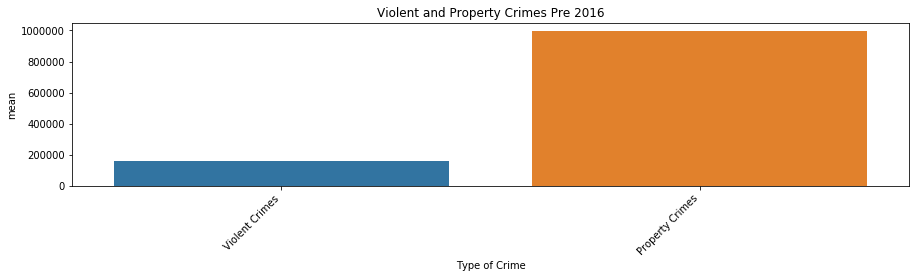

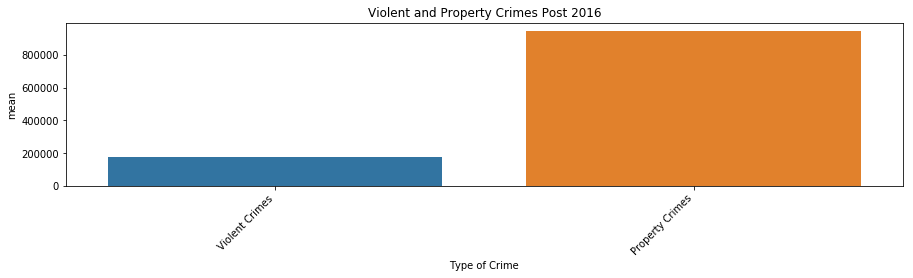

In [19]:
plt.figure(figsize=(15,3))
ax = sns.barplot(cali_pre_2016["Type of Crime"], cali_pre_2016["mean"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Violent and Property Crimes Pre 2016")
plt.show()

plt.figure(figsize=(15,3))
ax = sns.barplot(cali_post_2016["Type of Crime"], cali_post_2016["mean"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Violent and Property Crimes Post 2016")
plt.show()

## Crime By Year

In [20]:
all_cali = cali.transpose()
all_cali.reset_index(inplace=True)
all_cali.columns = all_cali.iloc[0]
all_cali

,Type of Crime,Violent Crimes,Property Crimes
0,Type of Crime,Violent Crimes,Property Crimes
1,2010,163957,981523
2,2011,155313,974666
3,2012,160629,1048764
4,2013,151634,1018333
5,2014,151425,946682
6,2015,166588,1023828
7,2016,174701,1001380
8,2017,178553,986769
9,2018,176866,940998


In [21]:
all_cali = all_cali.drop(index = 0)
all_cali.rename(columns={"Type of Crime" : "Year"},inplace=True)
all_cali.reset_index(inplace=True,drop=True)
all_cali.head(2)

,Year,Violent Crimes,Property Crimes
0,2010,163957,981523
1,2011,155313,974666


In [22]:
all_cali["total"] = all_cali.iloc[:,1:].sum(axis=1)
all_cali.head(2)

,Year,Violent Crimes,Property Crimes,total
0,2010,163957,981523,1145480.0
1,2011,155313,974666,1129979.0


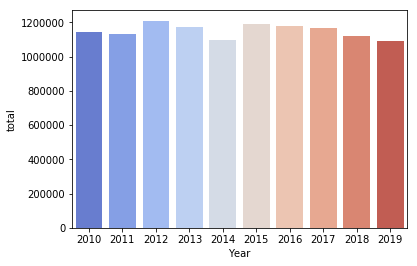

In [23]:
sns.barplot(x = all_cali["Year"], y = all_cali["total"], palette="coolwarm")

In [24]:
yearly_cali_pre_2016 = all_cali.iloc[0:7]
yearly_cali_pre_2016

,Year,Violent Crimes,Property Crimes,total
0,2010,163957,981523,1145480.0
1,2011,155313,974666,1129979.0
2,2012,160629,1048764,1209393.0
3,2013,151634,1018333,1169967.0
4,2014,151425,946682,1098107.0
5,2015,166588,1023828,1190416.0
6,2016,174701,1001380,1176081.0


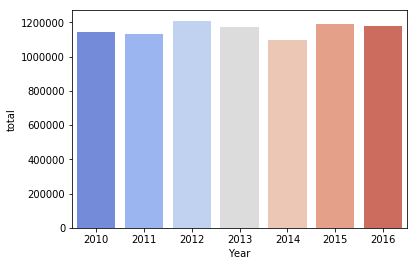

In [25]:
sns.barplot(x = yearly_cali_pre_2016["Year"], y = yearly_cali_pre_2016["total"], palette="coolwarm")

In [26]:
yearly_cali_post_2016 = all_cali.iloc[7:]
yearly_cali_post_2016

,Year,Violent Crimes,Property Crimes,total
7,2017,178553,986769,1165322.0
8,2018,176866,940998,1117864.0
9,2019,173205,915197,1088402.0


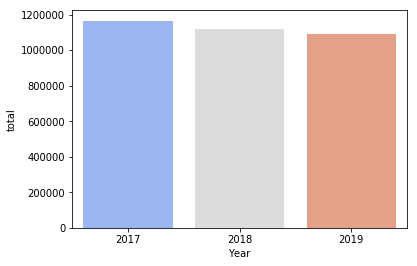

In [27]:
sns.barplot(x = yearly_cali_post_2016["Year"], y = yearly_cali_post_2016["total"], palette="coolwarm")

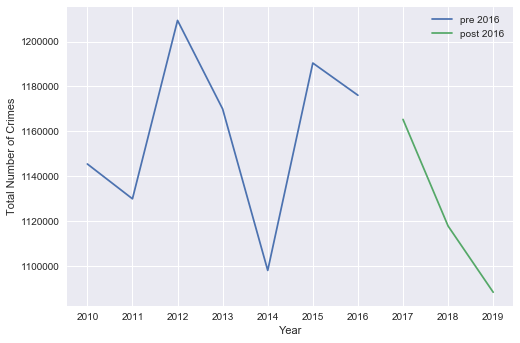

In [28]:
plt.style.use('seaborn')
plt.plot(yearly_cali_pre_2016['Year'],yearly_cali_pre_2016['total'], label = "pre 2016")
plt.plot(yearly_cali_post_2016['Year'],yearly_cali_post_2016['total'], label = "post 2016")
plt.ylabel("Total Number of Crimes")
plt.xlabel("Year")
plt.legend()

In [29]:
yearly_cali_post_2016= yearly_cali_post_2016.astype("int64")
yearly_cali_pre_2016= yearly_cali_pre_2016.astype("int64")

                                 OLS Regression Results                                
Dep. Variable:        Property Crimes   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              1770.
Date:                Wed, 14 Apr 2021   Prob (F-statistic):                    1.06e-06
Time:                        14:32:34   Log-Likelihood:                         -81.468
No. Observations:                   7   AIC:                                      168.9
Df Residuals:                       4   BIC:                                      168.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

C:\Users\tybuc\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


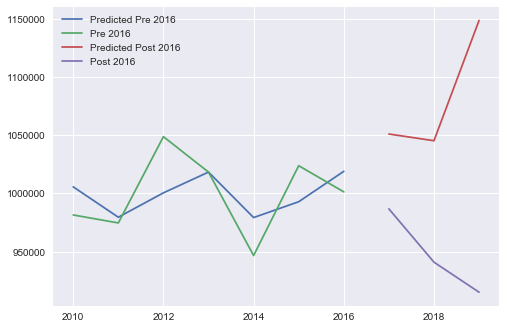

In [30]:
california_income = pd.read_csv("california_income.csv",names=["Date","Median Income"],header=1)
california_income_pre_2016 = california_income[25:32]
california_income_pre_2016.reset_index(inplace=True,drop=True)
california_income_post_2016 = california_income[32:]
california_income_post_2016.reset_index(inplace=True,drop=True)

california_population = pd.read_csv("california-population.csv",header=9)
california_population_pre_2016 = california_population[110:117]
california_population_pre_2016.reset_index(inplace=True,drop=True)
california_population_post_2016 = california_population[117:120]
california_population_post_2016.reset_index(inplace=True,drop=True)

california_unemployment = pd.read_csv("California_Unemployment_Statistics.csv")
california_unemployment_mask = california_unemployment["Area Name"] == "California"
california_unemployment = california_unemployment[california_unemployment_mask]
california_unemployment_pre_2016 = california_unemployment[20:27]
california_unemployment_pre_2016.reset_index(inplace=True,drop=True)

california_unemployment_post_2016 = california_unemployment[27:]
california_unemployment_post_2016.reset_index(inplace=True,drop=True)

factors = pd.DataFrame({"Income": california_income_pre_2016["Median Income"], 
                        "Population": california_population_pre_2016[" Population"],
                        "Unemployment": california_unemployment_pre_2016["Unemployment Rate"]})

factors
model = sm.OLS(yearly_cali_pre_2016["Property Crimes"],factors)
results= model.fit()

print(results.summary())

post_2016_factors = pd.DataFrame({"Income": california_income_post_2016["Median Income"], 
                                  "Population": california_population_post_2016[" Population"],
                                  "Unemployment": california_unemployment_post_2016["Unemployment Rate"]})

predicted = results.predict(post_2016_factors)

plt.plot(yearly_cali_pre_2016['Year'],results.predict(),label="Predicted Pre 2016")
plt.plot(yearly_cali_pre_2016['Year'],yearly_cali_pre_2016['Property Crimes'],label="Pre 2016")
plt.plot(yearly_cali_post_2016['Year'],predicted,label="Predicted Post 2016")
plt.plot(yearly_cali_post_2016['Year'],yearly_cali_post_2016['Property Crimes'],label="Post 2016")
plt.legend()


### Countries Dataset

In [31]:
countries = pd.read_csv('CountriesHomicides.csv',header=4)
countries = countries.drop(columns = [str(i) for i in range(1960,1990)])
countries = countries.drop(columns = ["2019","2020"])
countries = countries.drop(columns = ["Country Code","Indicator Name"])
countries = countries.dropna().iloc[:-1,:]
countries

,Country Name,Indicator Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
8,Armenia,VC.IHR.PSRC.P5,5.030858,5.306328,8.859017,7.968812,4.781244,3.605453,3.598243,3.191746,...,3.358616,1.946260,2.468247,2.253627,2.174218,2.472185,2.563613,2.963067,2.377080,1.693916
11,Australia,VC.IHR.PSRC.P5,2.205111,1.977982,1.729668,1.891700,1.797902,1.978538,1.946202,1.979637,...,1.209148,1.042669,1.100364,1.060952,1.053541,1.029817,0.986107,0.935592,0.825720,0.891632
12,Austria,VC.IHR.PSRC.P5,1.152260,1.325151,1.238677,1.013673,1.107306,0.976206,1.234745,0.821624,...,0.609126,0.689660,0.887206,0.929168,0.724622,0.522332,0.530035,0.651629,0.793660,0.967229
19,Bulgaria,VC.IHR.PSRC.P5,2.567448,4.277404,5.324802,5.713591,5.805432,5.895477,5.282219,4.846682,...,2.007089,1.993263,1.734734,1.922551,1.495180,1.573358,1.750063,1.104594,1.450203,1.304667
23,Belarus,VC.IHR.PSRC.P5,5.004367,4.576418,5.849717,7.459202,8.201197,9.526072,9.656686,10.200419,...,5.162640,4.256640,3.961630,3.610474,3.533718,3.604848,3.453601,3.250177,2.539620,2.390873
27,Brazil,VC.IHR.PSRC.P5,19.664802,18.561716,16.833232,17.859684,18.723517,20.985134,21.670465,22.219412,...,22.960855,22.109854,24.344537,26.621868,26.941954,28.849832,28.590256,29.877807,30.831363,27.382530
33,Canada,VC.IHR.PSRC.P5,2.385506,2.703593,2.597043,2.192801,2.065090,2.012745,2.152230,1.970253,...,1.807617,1.628227,1.754530,1.569210,1.442068,1.463647,1.693190,1.682107,1.796794,1.755921
35,Switzerland,VC.IHR.PSRC.P5,1.653421,1.458590,1.369075,1.528621,1.153002,1.172179,1.179308,1.230812,...,0.661144,0.665926,0.581764,0.561938,0.702933,0.499634,0.687014,0.536998,0.532179,0.586468
43,Colombia,VC.IHR.PSRC.P5,73.498827,84.198483,81.876518,81.048644,75.726437,61.285334,62.978089,61.499632,...,35.345209,34.184160,35.317630,35.680397,33.162355,28.408882,26.897771,25.743617,25.019503,25.343803
46,Costa Rica,VC.IHR.PSRC.P5,4.455934,4.122317,4.868364,4.744539,5.261896,5.189642,5.203227,5.646752,...,11.613146,11.513159,10.230762,8.681735,8.667026,9.947053,11.489736,11.797517,12.181929,11.261254


In [32]:
decriminalized = {'Armenia':2009,'Germany':2000,'Estonia':2002,'Croatia':2013,'Jamaica':2015,'Mexico':2009,'Poland':2017,'Portugal':2001,'Russian Federation':2004,'Switzerland':2012}
already_decriminalized = ['Colombia','Italy','Netherlands','Spain']

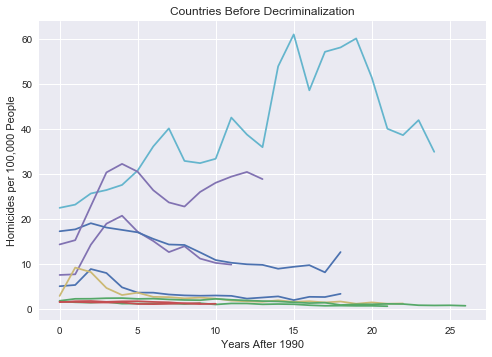

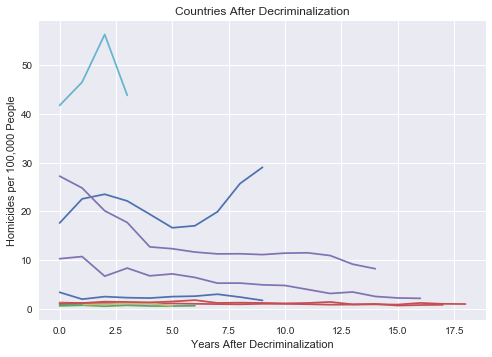

In [33]:
before= {}
after = {}
for row in countries.values:
    country = row[0]
    if country in decriminalized:
        year = 1988
        before[country] = row[1990-year:decriminalized[country]-year]
        after[country] = row[decriminalized[country]-year:2019-year]
for k,v in before.items():
    plt.plot(v)
plt.title("Countries Before Decriminalization")
plt.xlabel('Years After 1990')
plt.ylabel('Homicides per 100,000 People')
plt.show()
for k,v in after.items():
    plt.plot(v)
plt.xlabel('Years After Decriminalization')
plt.title("Countries After Decriminalization")
plt.ylabel('Homicides per 100,000 People')
plt.show()

In [34]:
import statsmodels.api as sm
before_slopes = []
for country,y in before.items():
    X = [i for i in range(len(y))]
    model = sm.OLS(y,X)
    result = model.fit()
    before_slopes.append(result.params[0])
after_slopes = []
for country,y in after.items():
    X = [i for i in range(len(y))]
    model = sm.OLS(y,X)
    result = model.fit()
    after_slopes.append(result.params[0])
print('Average yearly increase in homicides per 100,000 people before decriminalizing drugs:',sum(before_slopes)/len(before_slopes))
print('Average yearly increase in homicides per 100,000 people after decriminalizing drugs:',sum(after_slopes)/len(after_slopes))
print('Median yearly increase in homicides per 100,000 people before decriminalizing drugs:',np.median(before_slopes))
print('Median yearly increase in homicides per 100,000 people after decriminalizing drugs:',np.median(after_slopes))

Average yearly increase in homicides per 100,000 people before decriminalizing drugs: 0.932385771149465
Average yearly increase in homicides per 100,000 people after decriminalizing drugs: 2.746757125877214
Median yearly increase in homicides per 100,000 people before decriminalizing drugs: 0.2360799882357042
Median yearly increase in homicides per 100,000 people after decriminalizing drugs: 0.36744358305301855


# Results

# Discussion

# Conclusion

# References